## 抽取PDF内容

##### 实验内容：https://www.jianshu.com/p/31939ee6f1c9
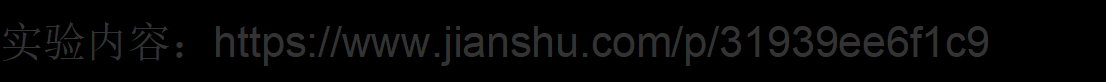
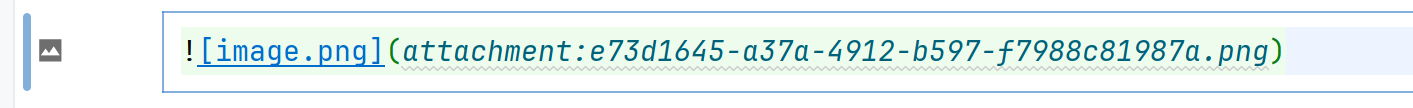
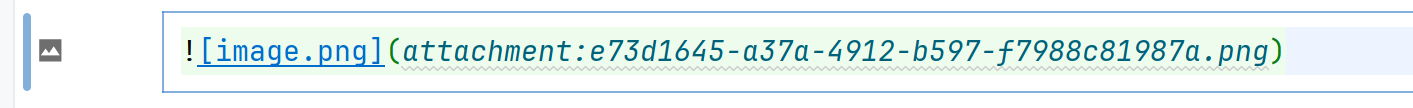
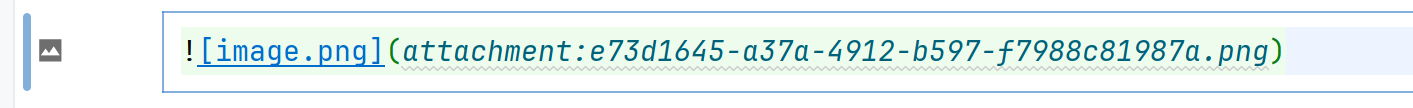

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

pdf_files = [
    "企业数字化转型与资本市场表现——来自股票流动性的经验证据_吴非.pdf",
    "卷积神经网络研究综述_周飞燕.pdf",
    "数字经济理论体系与研究展望_陈晓红.pdf",
    "深度卷积神经网络在计算机视觉中的应用研究综述_卢宏涛.pdf",
    "深度学习在食品安全检测与风险预警中的应用_丁浩晗.pdf"
]

In [14]:
import PyPDF2

results = []

for pdf_file in pdf_files:
    if os.path.exists(pdf_file):
        try:
            with open(pdf_file, 'rb') as file:
                reader = PyPDF2.PdfReader(file)
                text = ""
                total_pages = len(reader.pages)

                for page_num in range(total_pages):
                    page = reader.pages[page_num]
                    page_text = page.extract_text() or ""
                    text += page_text

                # 统计基本信息
                total_chars = len(text)
                non_space_chars = len(text.replace(" ", "").replace("\n", ""))
                word_count = len(text.split())

                # 获取文件名（不含扩展名）
                file_name = os.path.splitext(pdf_file)[0]

                results.append({
                    "文件名": file_name,
                    "页数": total_pages,
                    "总字符数": total_chars,
                    "非空字符数": non_space_chars,
                    "词数": word_count
                })

                print(f"✓ 处理完成: {file_name}")
                print(f"  页数: {total_pages}, 字符数: {total_chars}, 词数: {word_count}")

        except Exception as e:
            print(f"✗ 处理 {pdf_file} 时出错: {e}")
    else:
        print(f"✗ 文件不存在: {pdf_file}")

Multiple definitions in dictionary at byte 0x1aeb10 for key /MediaBox
C:\ProgramData\anaconda3\envs\anaconda\Lib\site-packages\PyPDF2\_cmap.py:142: PdfReadWarning: Advanced encoding /GBK-EUC-H not implemented yet
  warnings.warn(
Multiple definitions in dictionary at byte 0x35ae44 for key /MediaBox


✓ 处理完成: 企业数字化转型与资本市场表现——来自股票流动性的经验证据_吴非
  页数: 16, 字符数: 40200, 词数: 4011


Multiple definitions in dictionary at byte 0x1decb2 for key /MediaBox


✓ 处理完成: 卷积神经网络研究综述_周飞燕
  页数: 23, 字符数: 113892, 词数: 33339


Multiple definitions in dictionary at byte 0x17ffdd for key /MediaBox


✓ 处理完成: 数字经济理论体系与研究展望_陈晓红
  页数: 21, 字符数: 50043, 词数: 5020


Multiple definitions in dictionary at byte 0x1a2bf6 for key /MediaBox


✓ 处理完成: 深度卷积神经网络在计算机视觉中的应用研究综述_卢宏涛
  页数: 17, 字符数: 62616, 词数: 16336
✓ 处理完成: 深度学习在食品安全检测与风险预警中的应用_丁浩晗
  页数: 14, 字符数: 47278, 词数: 4401


In [15]:
df = pd.DataFrame(results)

print("\n" + "="*50)
print("PDF文件统计汇总:")
print("="*50)
print(df.to_string(index=False))

# 保存统计结果到Excel
df.to_excel("PDF统计结果.xlsx", index=False)
print(f"\n统计结果已保存为: PDF统计结果.xlsx")


PDF文件统计汇总:
                            文件名  页数   总字符数  非空字符数    词数
企业数字化转型与资本市场表现——来自股票流动性的经验证据_吴非  16  40200  36190  4011
                 卷积神经网络研究综述_周飞燕  23 113892  78033 33339
              数字经济理论体系与研究展望_陈晓红  21  50043  45024  5020
     深度卷积神经网络在计算机视觉中的应用研究综述_卢宏涛  17  62616  45350 16336
       深度学习在食品安全检测与风险预警中的应用_丁浩晗  14  47278  42502  4401

统计结果已保存为: PDF统计结果.xlsx


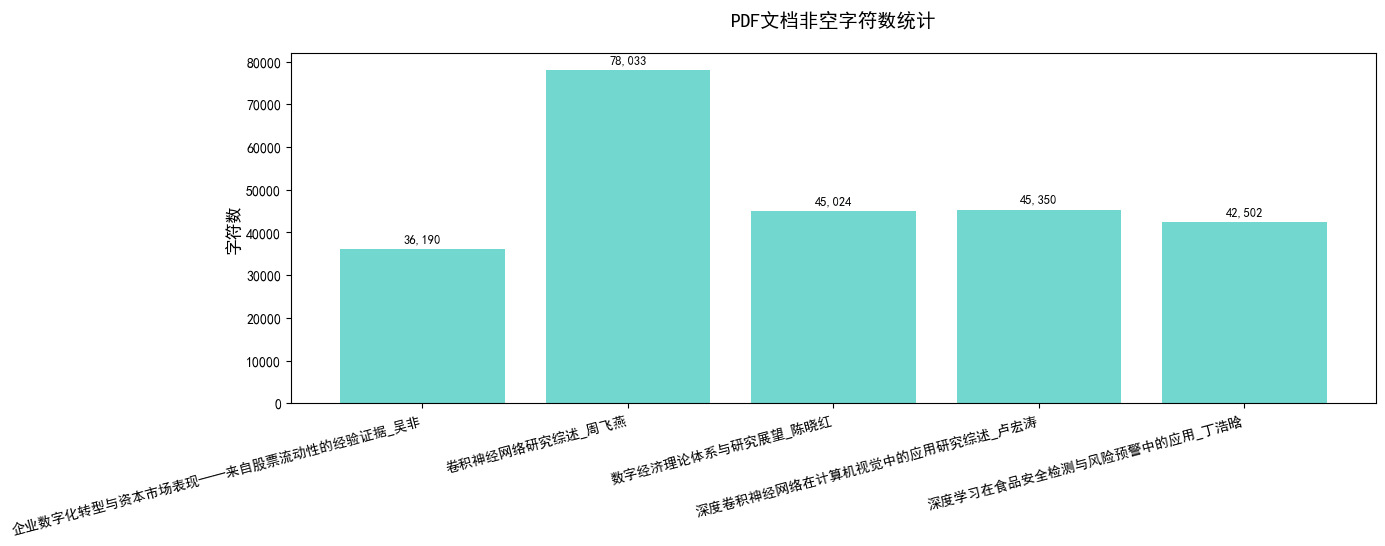

In [16]:
# 1. 绘制字符数柱状图
plt.figure(figsize=(14, 10))

# 子图1：字符数统计
plt.subplot(2, 1, 1)
bars1 = plt.bar(df["文件名"], df["非空字符数"], color='#4ECDC4', alpha=0.8)
plt.title("PDF文档非空字符数统计", fontsize=14, fontweight='bold', pad=20)
plt.ylabel("字符数", fontsize=12)
plt.xticks(rotation=15, ha='right')

# 在柱子上显示数值
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)


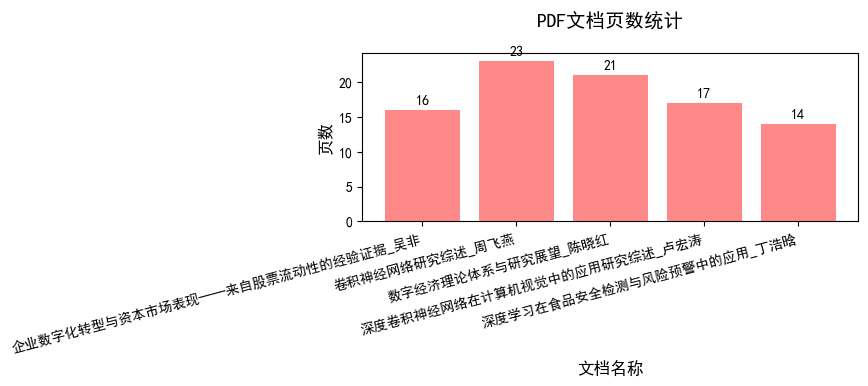

In [17]:
# 子图2：页数统计
plt.subplot(2, 1, 2)
bars2 = plt.bar(df["文件名"], df["页数"], color='#FF6B6B', alpha=0.8)
plt.title("PDF文档页数统计", fontsize=14, fontweight='bold', pad=20)
plt.ylabel("页数", fontsize=12)
plt.xlabel("文档名称", fontsize=12)
plt.xticks(rotation=15, ha='right')

# 在柱子上显示页数
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

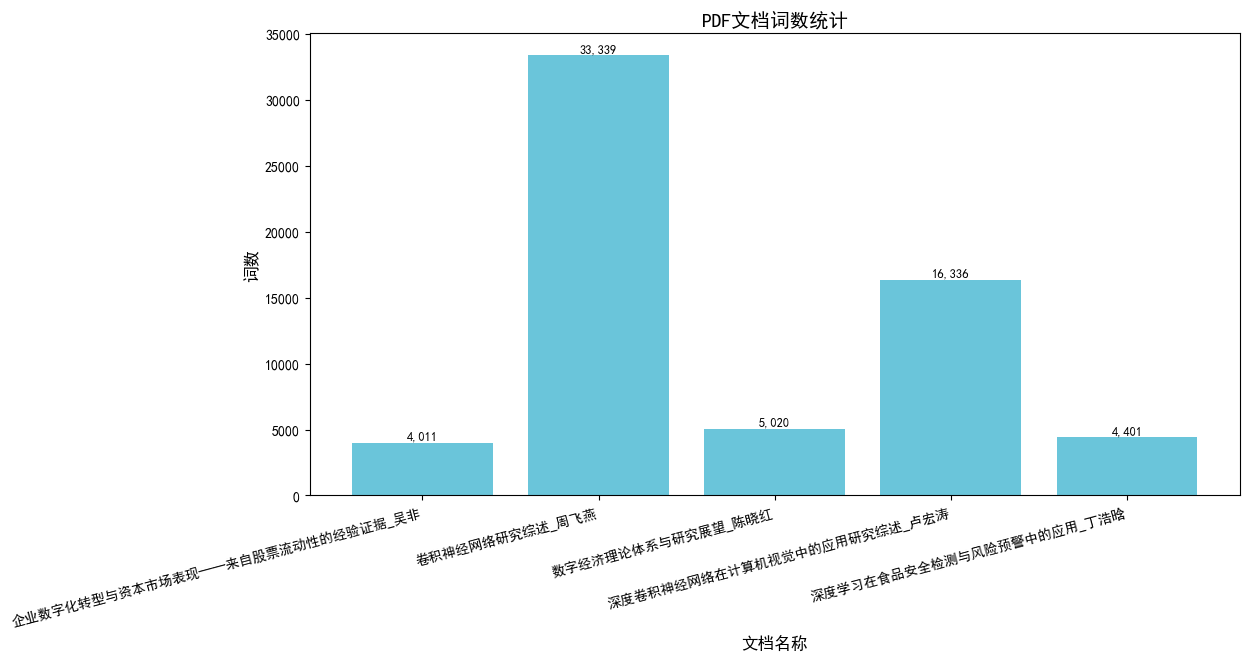

In [18]:
# 2. 绘制词数统计图
plt.figure(figsize=(12, 6))
bars3 = plt.bar(df["文件名"], df["词数"], color='#45B7D1', alpha=0.8)
plt.title("PDF文档词数统计", fontsize=14, fontweight='bold')
plt.ylabel("词数", fontsize=12)
plt.xlabel("文档名称", fontsize=12)
plt.xticks(rotation=15, ha='right')

# 在柱子上显示数值
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

图表已保存为: PDF字符数统计.png


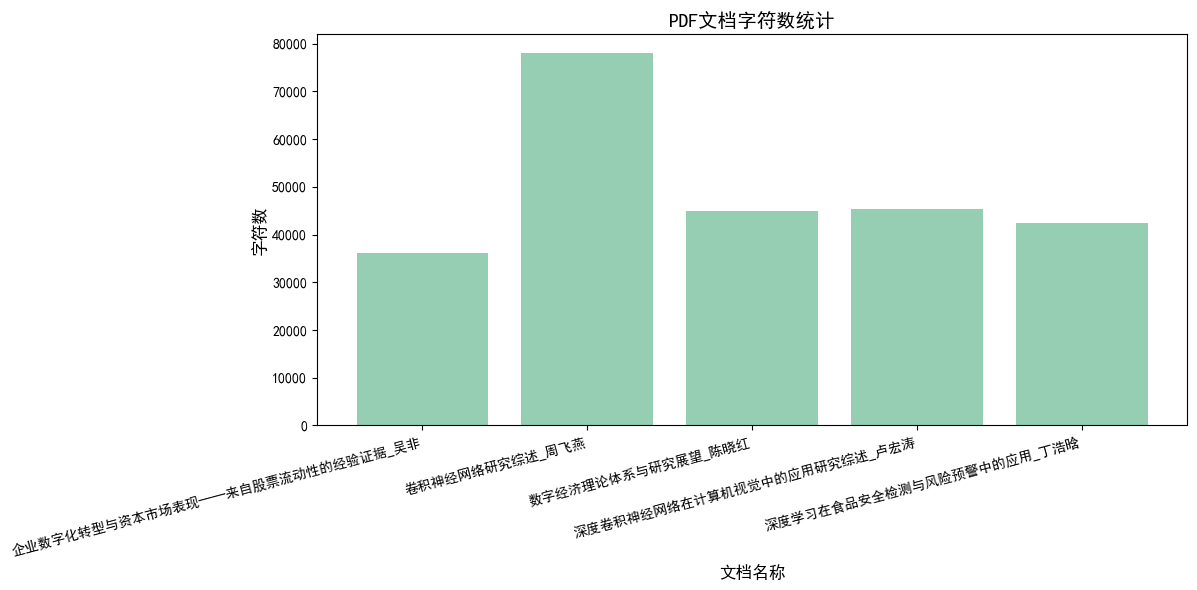

In [19]:
plt.figure(figsize=(12, 6))
bars = plt.bar(df["文件名"], df["非空字符数"], color='#96CEB4')
plt.title("PDF文档字符数统计", fontsize=14, fontweight='bold')
plt.ylabel("字符数", fontsize=12)
plt.xlabel("文档名称", fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig("PDF字符数统计.png", dpi=300, bbox_inches='tight')
print("图表已保存为: PDF字符数统计.png")